In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read Dataset

In [6]:
true_news = pd.read_csv(r'C:\Users\Mitko\Desktop\fake_news detection\Fake.csv')
fake_news = pd.read_csv(r'C:\Users\Mitko\Desktop\fake_news detection\True.csv')


In [8]:
true_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
fake_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


making target variable

In [12]:
true_news = true_news.assign(target=1)
fake_news = fake_news.assign(target=0)

Append both the data to one dataframe.

In [13]:
dataset = true_news.append(fake_news).sample(frac = 1).reset_index().drop(columns = ['index'])
dataset.head()

C:\Users\Mitko\AppData\Local\Temp\ipykernel_13140\1122744664.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = true_news.append(fake_news).sample(frac = 1).reset_index().drop(columns = ['index'])


,title,text,subject,date,target
0,EU warns Trump against recognizing Jerusalem a...,BRUSSELS (Reuters) - The European Union’s top ...,politicsNews,"December 5, 2017",0
1,Exclusive: Skeptical Trump says would renegoti...,NEW YORK (Reuters) - Republican presidential c...,politicsNews,"May 17, 2016",0
2,FRIGHTENING POWER OF THE PRESS: You Won’t Beli...,Remember when the press used to actually repor...,left-news,"Jun 18, 2016",1
3,Trump’s Son Thinks Batsh*t Crazy Pizzagate Co...,We can t say enough bad things about rape apol...,News,"April 4, 2017",1
4,Gwenyth Paltrow Can’t Understand Why She Was N...,Obama drone Gwyneth Paltrow can t understand w...,left-news,"Jun 30, 2016",1


Visualize data to see the true/fake news ratio.

([<matplotlib.patches.Wedge at 0x18e6af68070>,
 [Text(-1.1968727067385088, -0.0865778485782335, 'Fake'),
  Text(1.1968726986325005, 0.08657796063754254, 'True')],
 [Text(-0.6981757455974634, -0.05050374500396954, '52.3%'),
  Text(0.6981757408689586, 0.05050381037189981, '47.7%')])

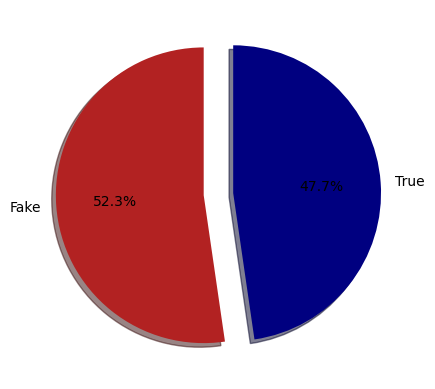

In [20]:
label_size = [dataset['target'].sum(), len(dataset['target'])-dataset['target'].sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')



In [21]:
!pip install tensorflow-hub

     ---------------------------------------- 90.3/90.3 kB 5.3 MB/s eta 0:00:00


In [ ]:
!pip install -q tf-models-official

In [10]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Split data to train, validation, test set.

In [11]:
x_train, x_test, y_train, y_test = train_test_split(dataset['title'],dataset['target'],test_size = 0.3, random_state = 42)
x_val, xval_test, y_val, yval_test = train_test_split(x_test,y_test, test_size =0.5,random_state = 42)

This is the classifier model that uses BERT model. This code block is taken from [here](https://www.tensorflow.org/text/tutorials/classify_text_with_bert).

In [12]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [13]:
classifier_model = build_classifier_model() 

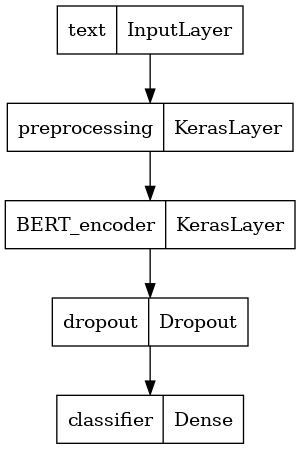

In [14]:
tf.keras.utils.plot_model(classifier_model)

In [15]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [16]:
epochs = 8
steps_per_epoch = 10
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 1e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [17]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [18]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=x_train,y=y_train,
                               validation_data=(x_val,y_val),
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/8
983/983 [==============================] - 189s 183ms/step - loss: 0.3742 - binary_accuracy: 0.8453 - val_loss: 0.3287 - val_binary_accuracy: 0.8870
Epoch 2/8
983/983 [==============================] - 178s 181ms/step - loss: 0.3633 - binary_accuracy: 0.8567 - val_loss: 0.3287 - val_binary_accuracy: 0.8870
Epoch 3/8
983/983 [==============================] - 182s 186ms/step - loss: 0.3644 - binary_accuracy: 0.8558 - val_loss: 0.3287 - val_binary_accuracy: 0.8870
Epoch 4/8
983/983 [==============================] - 178s 181ms/step - loss: 0.3632 - binary_accuracy: 0.8570 - val_loss: 0.3287 - val_binary_accuracy: 0.8870
Epoch 5/8
983/983 [==============================] - 180s 184ms/step - loss: 0.3646 - binary_accuracy: 0.8565 - val_loss: 0.3287 - val_binary_accuracy: 0.8870
Epoch 6/8
983/983 [==============================] - 181s 184ms/step - loss: 0.3639 - binary_accuracy: 0.8575 - v

In [19]:
loss, accuracy = classifier_model.evaluate(x_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

421/421 [==============================] - 26s 60ms/step - loss: 0.0000e+00 - binary_accuracy: 0.0000e+00
Loss: 0.0
Accuracy: 0.0


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


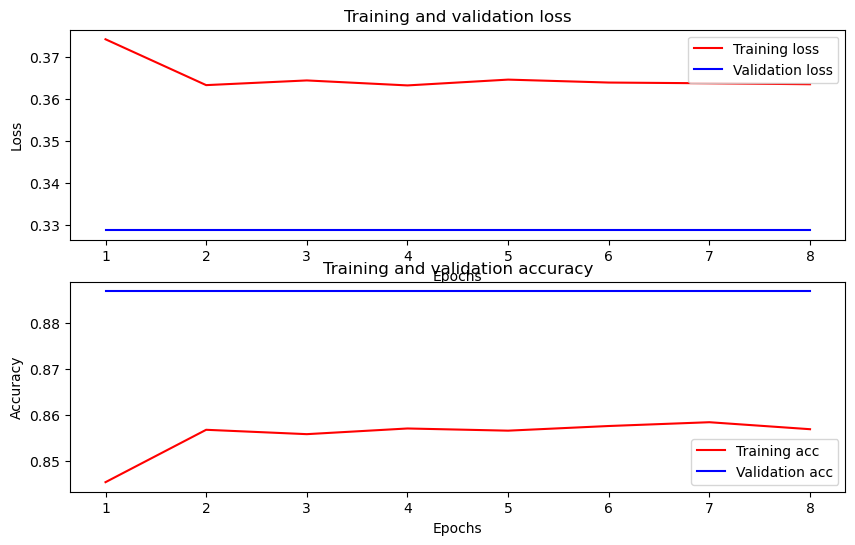

In [20]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')